In [22]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [23]:
from sklearn.datasets import make_blobs, make_circles, make_moons

In [131]:
rng = np.random.RandomState(6)
X_blobs, y_blobs = make_blobs(n_samples=200, random_state=1)
X_blobs = scale(X_blobs @ rng.normal(0, 4, size=(2, 2)))
X_circles, y_circles = make_circles(n_samples=400, random_state=0, noise=.09, factor=.4)
X_circles = scale(X_circles)
X_moons, y_moons = make_moons(n_samples=200, random_state=0, noise=.09)
X_moons = scale(X_moons)


In [145]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score

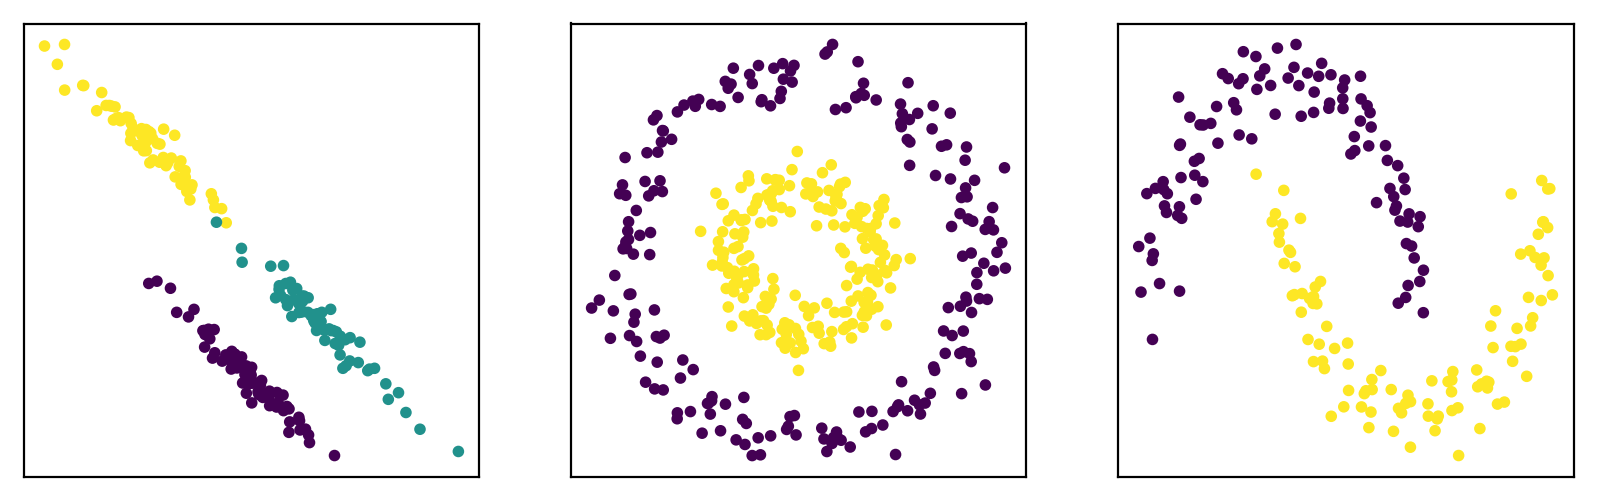

In [132]:
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 3))
for ax, (X, y) in zip(axes, [(X_blobs, y_blobs), (X_circles, y_circles), (X_moons, y_moons)]):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10)

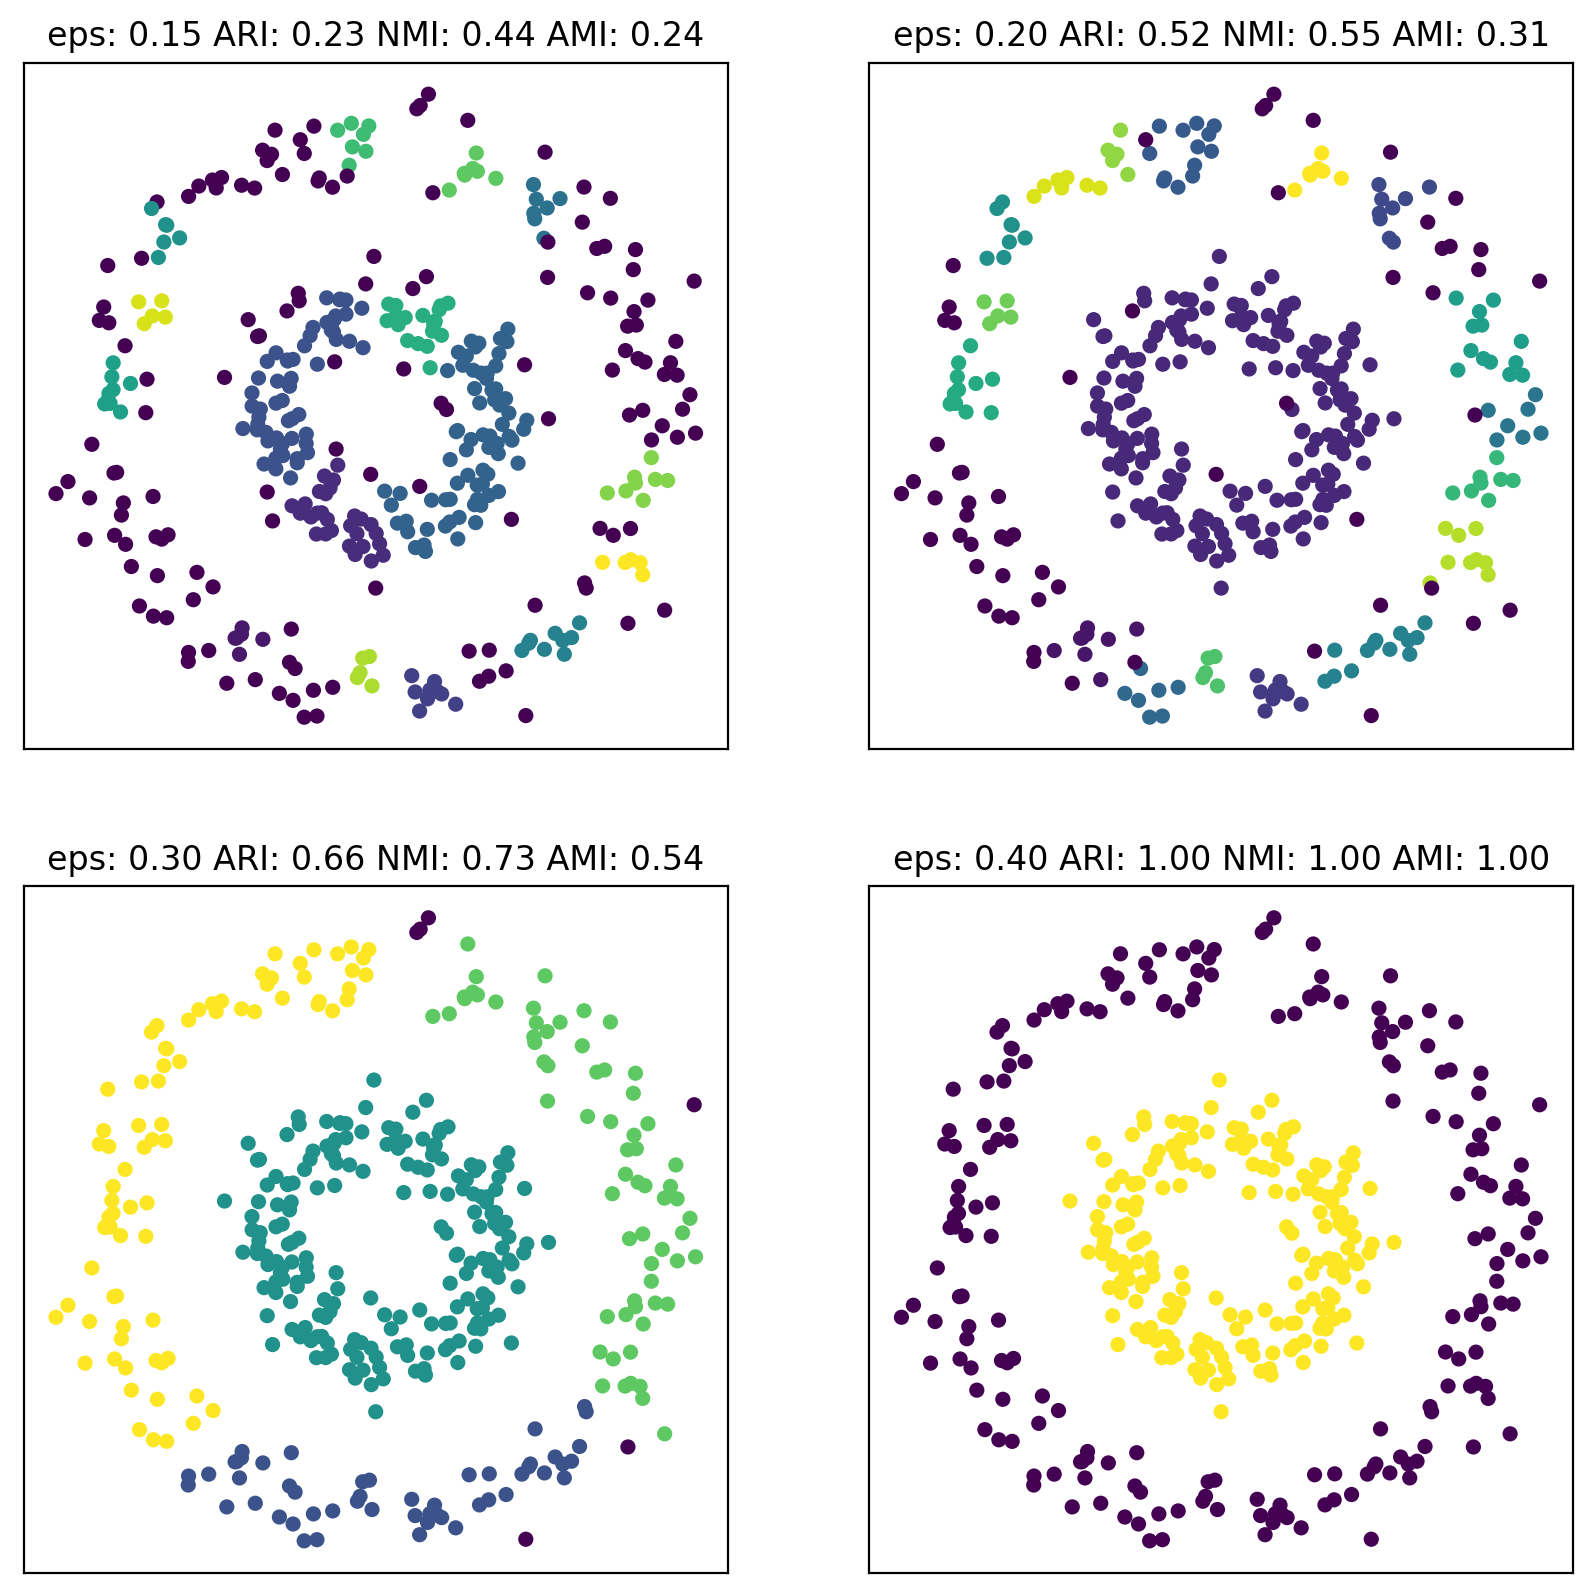

In [150]:
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
for ax, eps in zip(axes.ravel(), [.15, .2, .3, .4]):
    dbs = DBSCAN(eps=eps).fit(X_circles)
    ari = adjusted_rand_score(y_circles, dbs.labels_)
    nmi = normalized_mutual_info_score(y_circles, dbs.labels_)
    ami = adjusted_mutual_info_score(y_circles, dbs.labels_)
    ax.set_title("eps: {:.2f} ARI: {:.2f} NMI: {:.2f} AMI: {:.2f}".format(eps, ari, nmi, ami))
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=dbs.labels_, s=20)

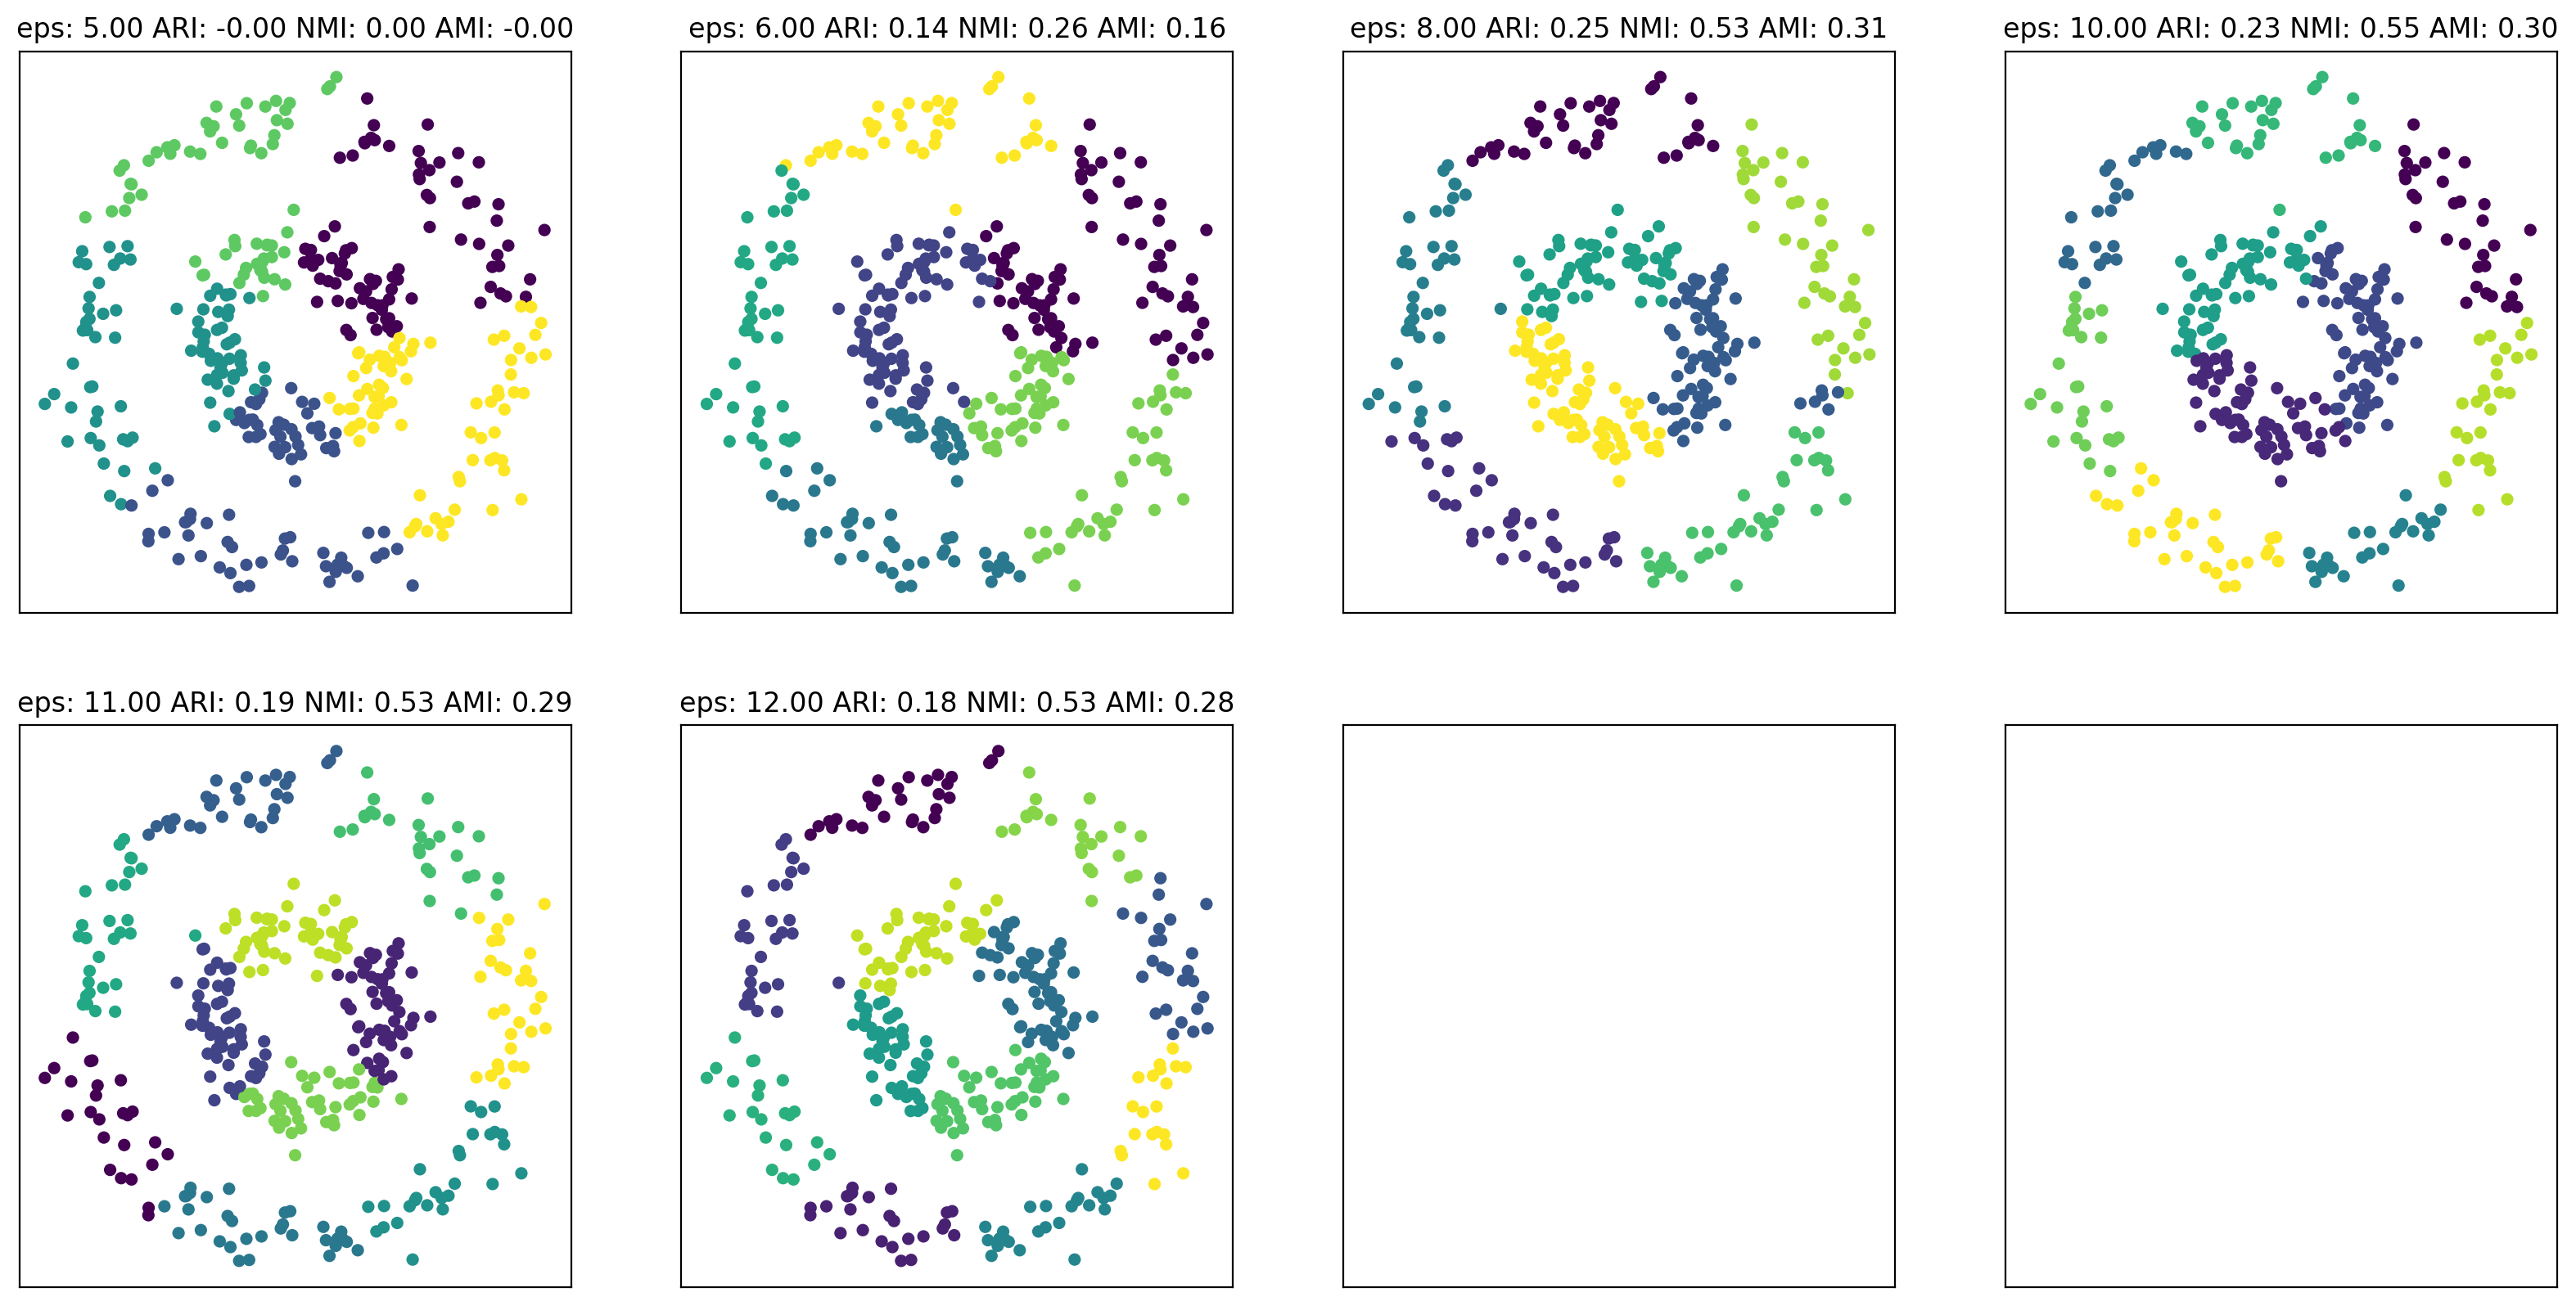

In [156]:
fig, axes = plt.subplots(2, 4, subplot_kw={'xticks': (), 'yticks':()}, figsize=(20, 10))
for ax, eps in zip(axes.ravel(), [5, 6, 8, 10, 11, 12]):
    dbs = KMeans(n_clusters=eps).fit(X_circles)
    ari = adjusted_rand_score(y_circles, dbs.labels_)
    nmi = normalized_mutual_info_score(y_circles, dbs.labels_)
    ami = adjusted_mutual_info_score(y_circles, dbs.labels_)
    ax.set_title("eps: {:.2f} ARI: {:.2f} NMI: {:.2f} AMI: {:.2f}".format(eps, ari, nmi, ami))
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=dbs.labels_, s=20)

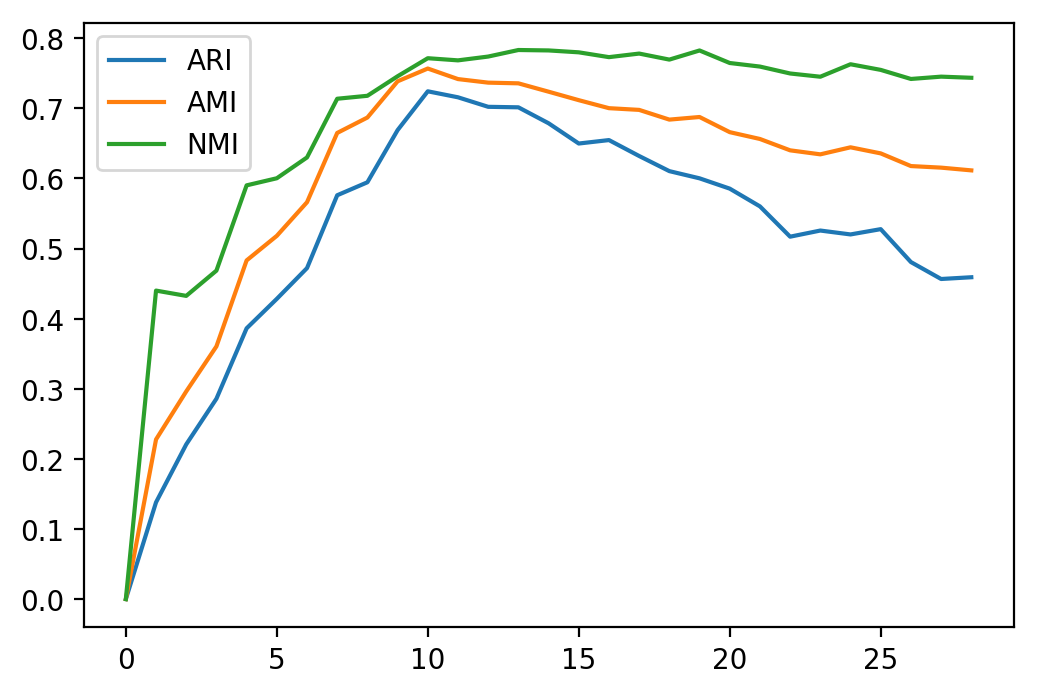

In [161]:
from sklearn.datasets import load_digits
digits = load_digits()
aris, nmis, amis = [], [], []
for i in range(1, 30):
    km = KMeans(n_clusters=i).fit(digits.data)
    ari = adjusted_rand_score(digits.target, km.labels_)
    nmi = normalized_mutual_info_score(digits.target, km.labels_)
    ami = adjusted_mutual_info_score(digits.target, km.labels_)
    aris.append(ari)
    nmis.append(nmi)
    amis.append(ami)
plt.plot(aris, label="ARI")
plt.plot(amis, label="AMI")
plt.plot(nmis, label="NMI")
plt.legend()

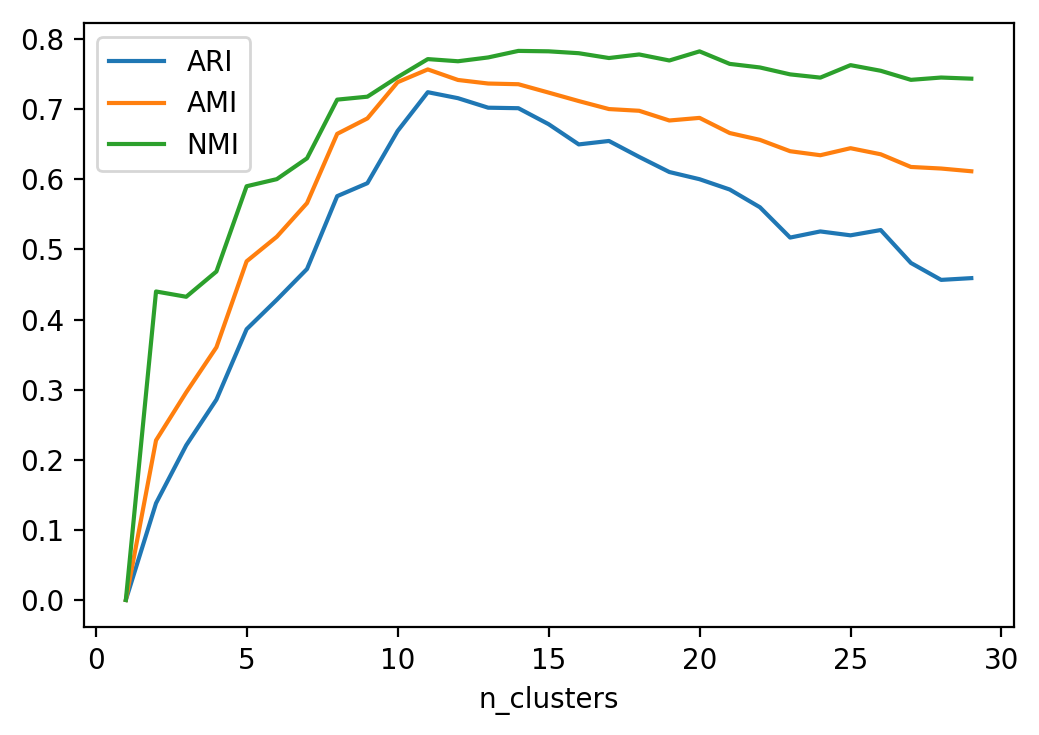

In [163]:
plt.plot(range(1, 30), aris, label="ARI")
plt.plot(range(1, 30), amis, label="AMI")
plt.plot(range(1, 30), nmis, label="NMI")
plt.legend()
plt.xlabel("n_clusters")

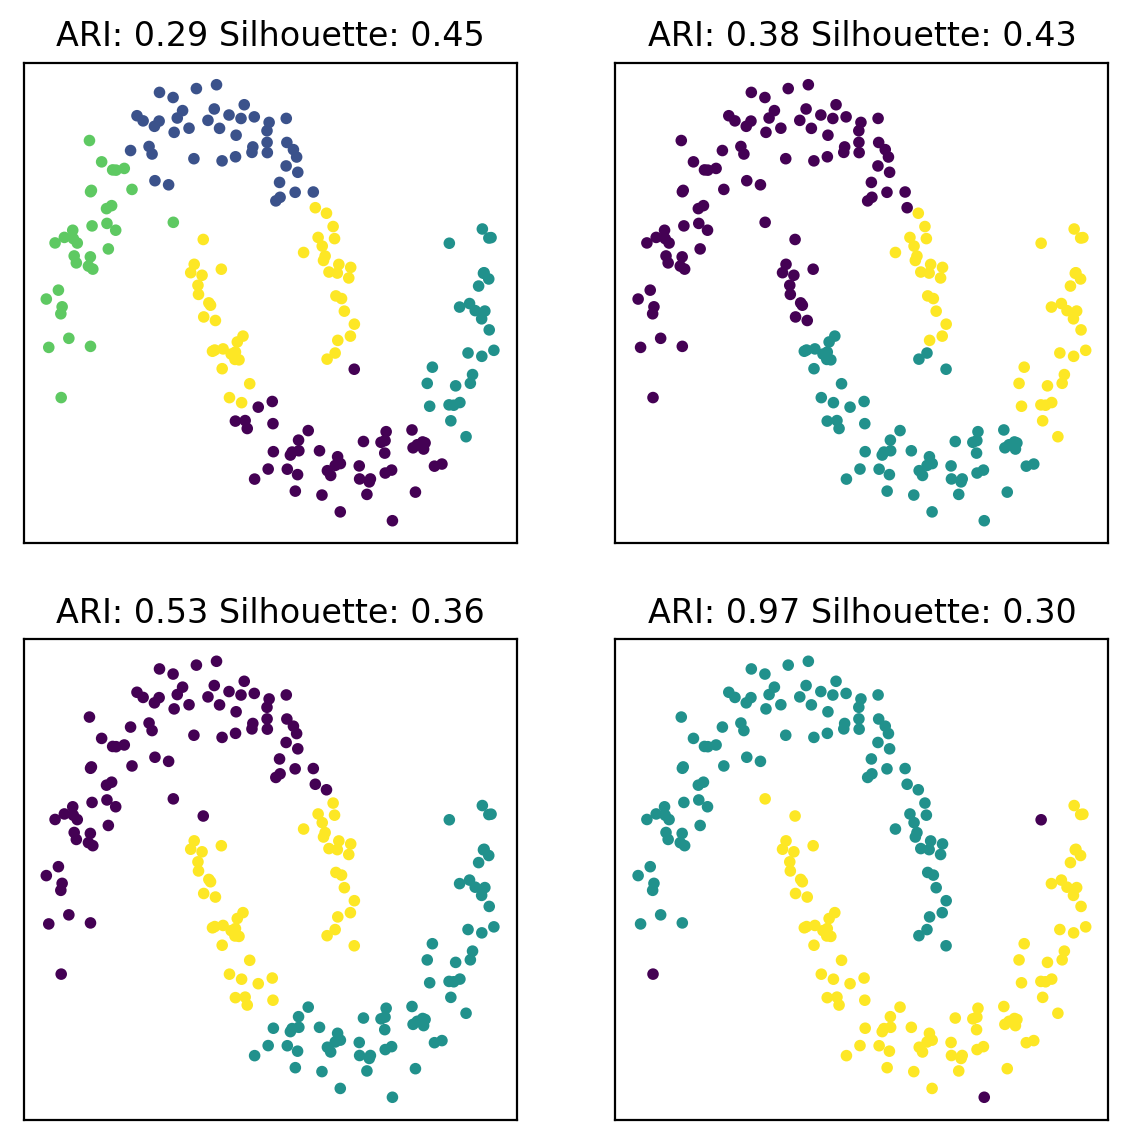

In [180]:
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(7, 7))
agg = AgglomerativeClustering(n_clusters=3, connectivity=lambda x: kneighbors_graph(x, 10))

for ax, alg in zip(axes.ravel(), [KMeans(n_clusters=5), KMeans(n_clusters=3), agg, DBSCAN(eps=.3)]):
    alg.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=alg.labels_, s=10)
    #ax.set_aspect("equal")
    ari = adjusted_rand_score(y, alg.labels_)
    silhouette = silhouette_score(X, alg.labels_)
    ax.set_title("ARI: {:.2f} Silhouette: {:.2f}".format(ari, silhouette))


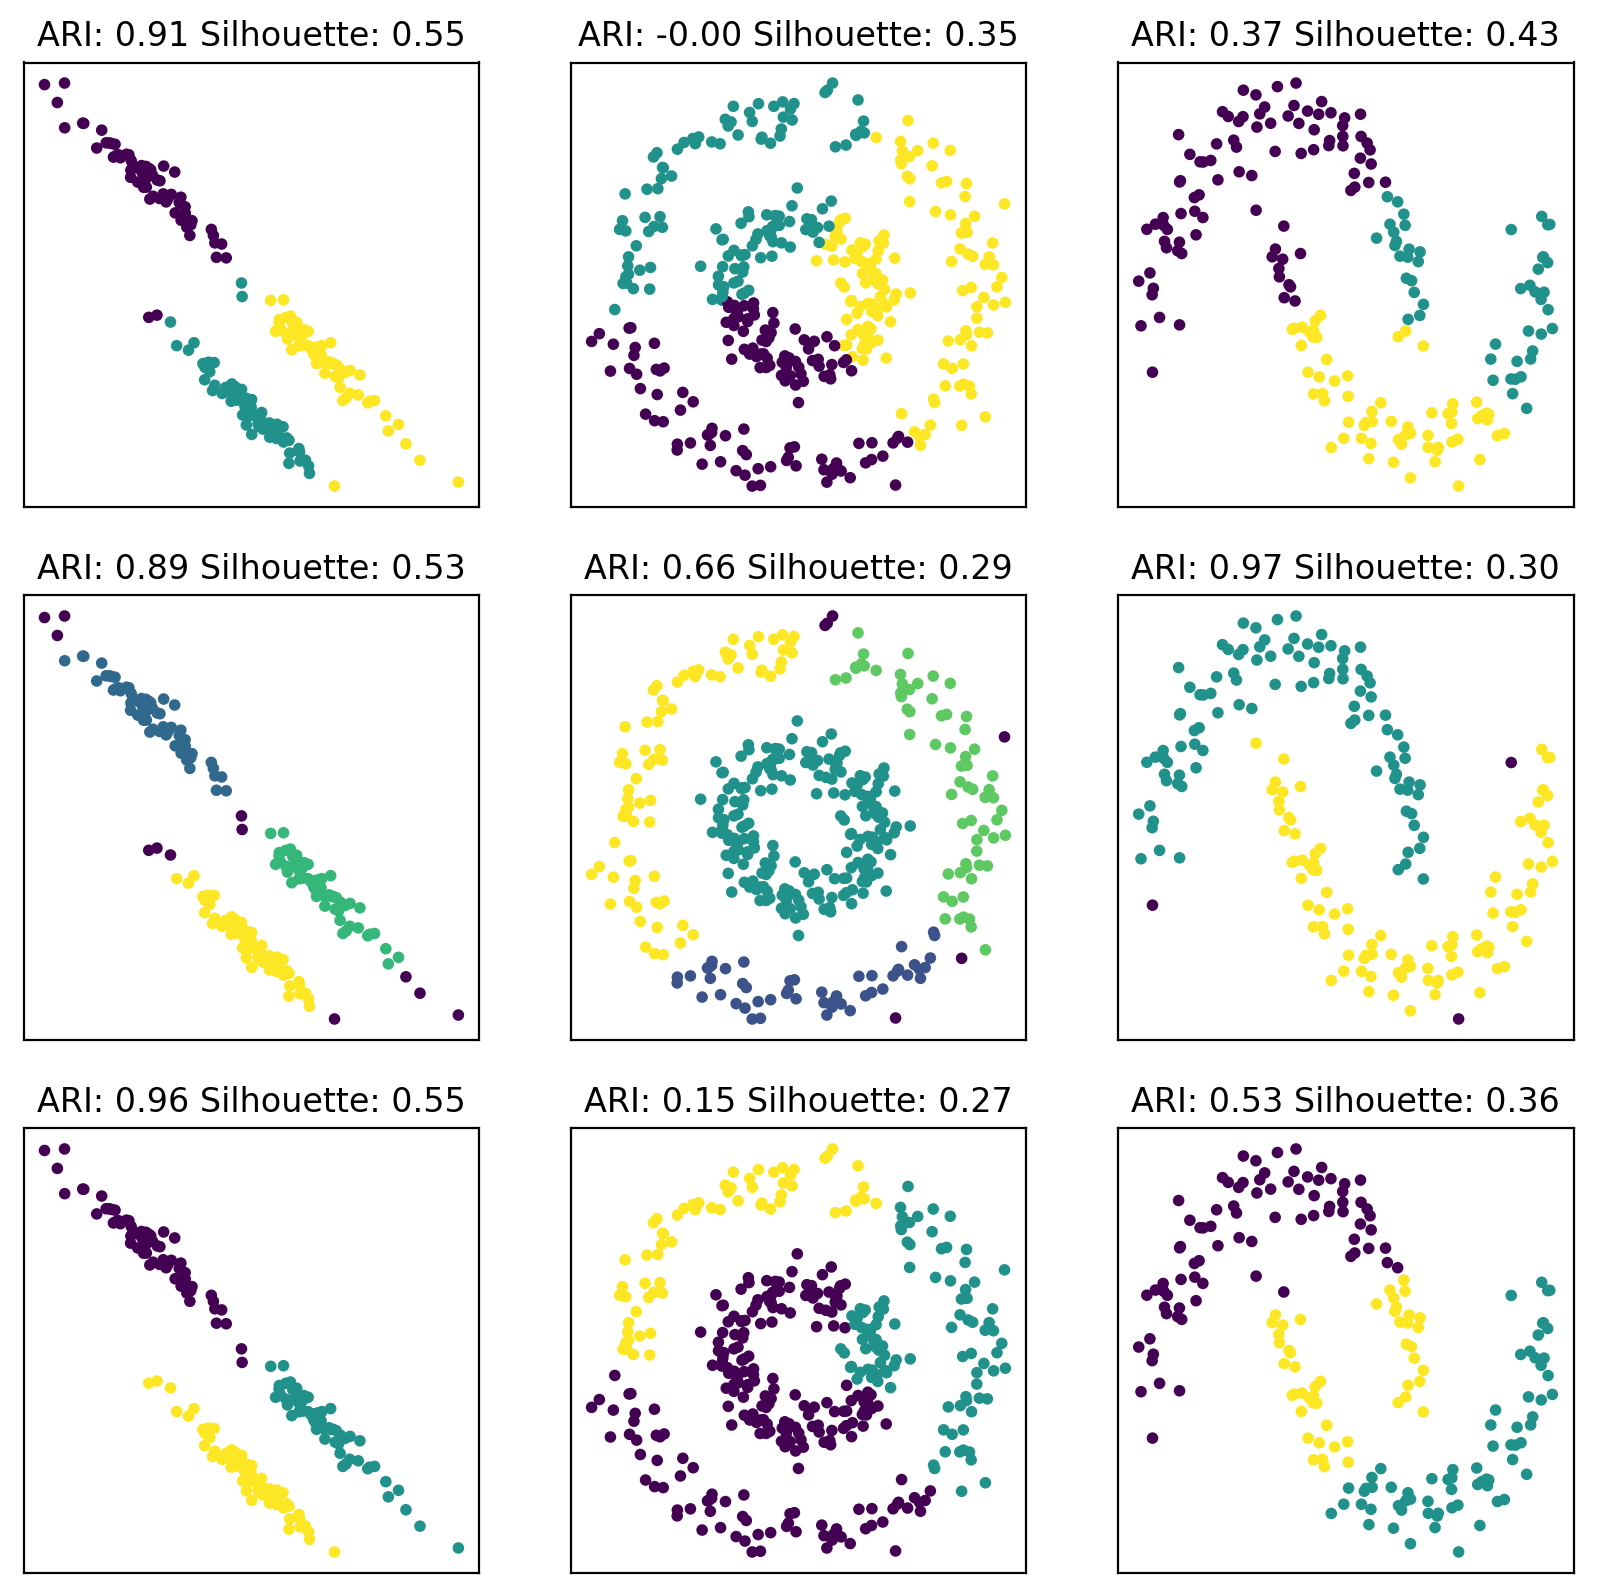

In [164]:
fig, axes = plt.subplots(3, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
agg = AgglomerativeClustering(n_clusters=3, connectivity=lambda x: kneighbors_graph(x, 10))
for axes2, alg in zip(axes, [KMeans(n_clusters=3), DBSCAN(eps=.3), agg]):
    for ax, (X, y) in zip(axes2, [(X_blobs, y_blobs), (X_circles, y_circles), (X_moons, y_moons)]):
        alg.fit(X)
        ax.scatter(X[:, 0], X[:, 1], c=alg.labels_, s=10)
        #ax.set_aspect("equal")
        ari = adjusted_rand_score(y, alg.labels_)
        silhouette = silhouette_score(X, alg.labels_)
        ax.set_title("ARI: {:.2f} Silhouette: {:.2f}".format(ari, silhouette))


In [230]:
from sklearn.metrics import silhouette_samples

def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    labels = np.unique(cluster_labels)
    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Vega10(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

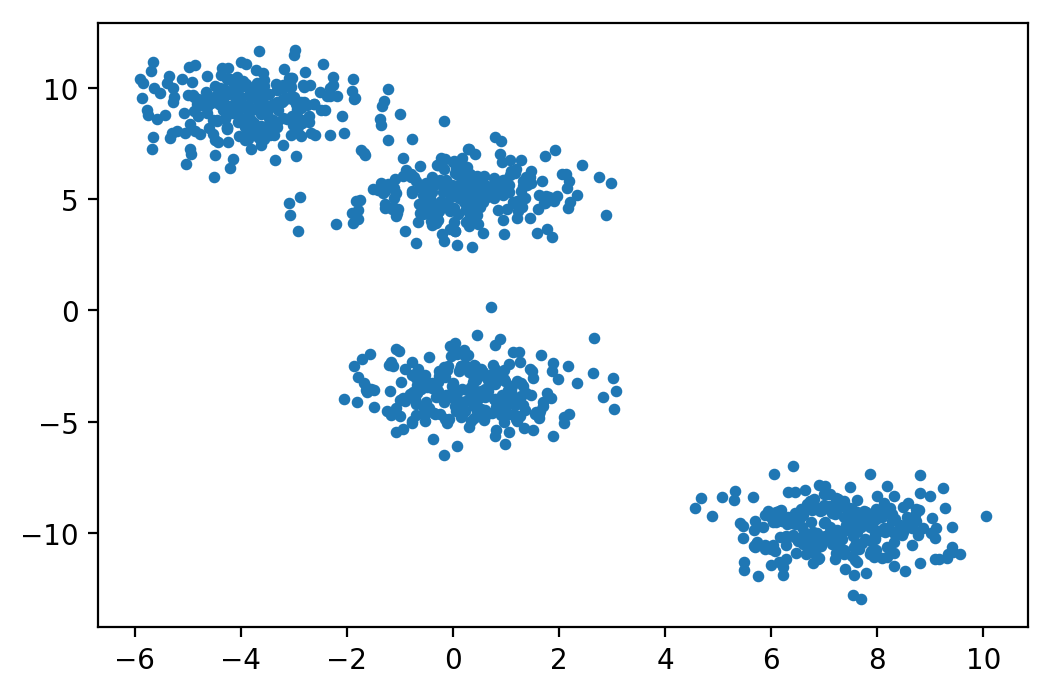

In [231]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=14)
plt.scatter(X[:, 0], X[:, 1], s=10)

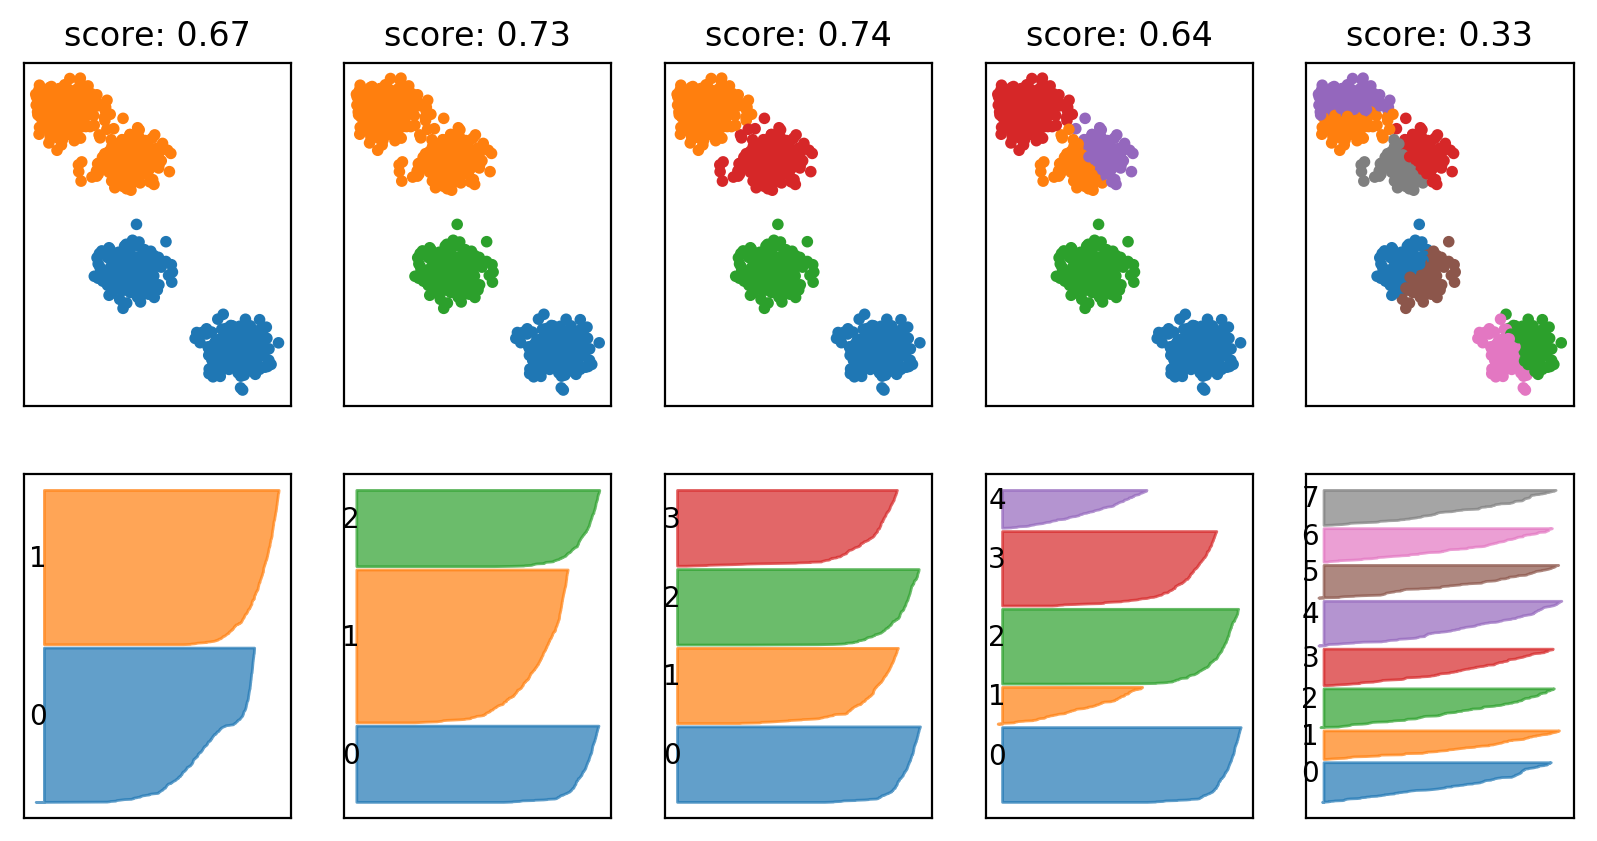

In [237]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
for ax, n_clusters in zip(axes.T, [2, 3, 4, 5, 8]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    silhouette_plot(X, km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, km.labels_)))

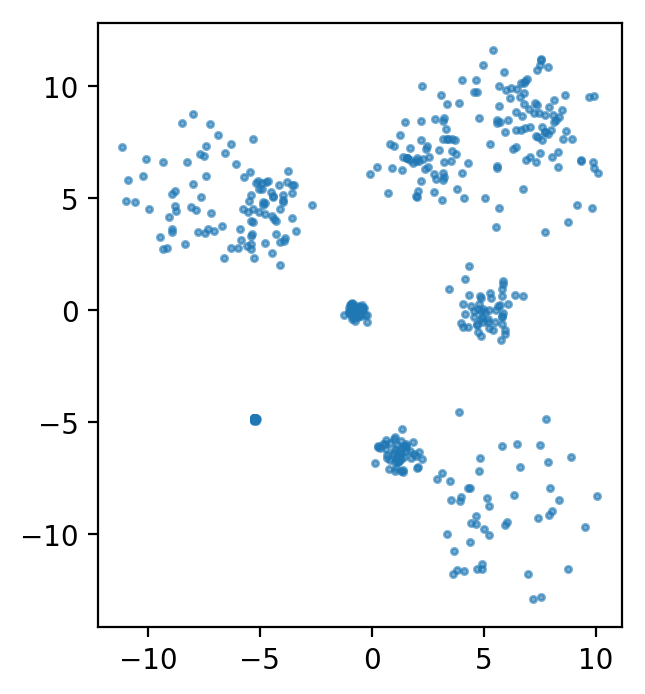

In [188]:
rng = np.random.RandomState(20)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()